In [1]:
################################################################################################################################
############################## PRACTICA DL-CV: Jordi Ortega - IA2 ##############################################################
################################################################################################################################

# 0. Hito 4. Early Fusion

# 1. Entorno -> Importamos librerías y cargamos el dataset
# 2. Red Neuronal -> Importamos los modelos, lanzamos el algoritmo y conclusiones

In [2]:
################################################################################################################################
############################## ENTORNO #########################################################################################
################################################################################################################################

In [3]:
# Instalamos librerías e importamos los modelos de los hito 1 e hito 2

!pip install tensorflow==2.18
#%pip install tensorflow==2.17
!pip uninstall tf-keras -y
!pip install -U tensorflow

from google.colab import drive
import tensorflow as tf
from tensorflow.keras.models import load_model

drive.mount('/content/drive')
model1 = load_model('/content/drive/MyDrive/modelo_tabular.keras')
model2 = load_model('/content/drive/MyDrive/modelo_pictures_2.keras')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [4]:
num_layers1 = len(model1.layers)
print("Número de capas del modelo 1:", num_layers1)

num_layers2 = len(model2.layers)
print("Número de capas del modelo 1:", num_layers2)

Número de capas del modelo 1: 4
Número de capas del modelo 1: 180


In [5]:
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,698 (22.26 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

None


In [ ]:
print(model2.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │ 256)                   │                │                        │
├──────────────────────

 Total params: 23,988,997 (91.51 MB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 267,524 (1.02 MB)

None


In [ ]:
################################################################################################################################
############################## RED NEURONAL LATE FUSION ########################################################################
################################################################################################################################

In [ ]:
# Prepramos la red neuronal con Early Fusion. Nos quedaremos con un vector de características de cada modelo y luego aprenderán de forma conjunta.

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam

input1 = Input(shape=(47,))
input2 = Input(shape=(224, 224, 3))

# Selección vector del modelo tabular en base a la capa elegida
x1 = model1.layers[0](input1)
x1 = model1.layers[1](x1)
x1 = model1.layers[2](x1)

# Selección vector del modelo imagen en base a la capa elegida
model2_intermediate = Model(inputs=model2.input, outputs=model2.layers[140].output)
x2 = model2_intermediate(input2)
x2_flat = Flatten()(x2)

fused = Concatenate()([x1, x2_flat])

# Añadimos las capas comunes después de la fusión
x = Dense(128, name="ef_1")(fused)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(64, name="ef_2")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, name="ef_3")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, name="ef_4", activation='relu')(x)

final_output = Dense(1)(x)

final_model = Model(inputs=[input1, input2], outputs=final_output)

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
final_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

final_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16            │ (None, 47)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          3,072 │ input_layer_16[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_17            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          2,080 │ dense[9][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_13             │ (None, 14, 14, 1024)   │      8,589,184 │ input_layer_17[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 16)             │            528 │ dense_1[7][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 200704)         │              0 │ functional_13[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 200720)         │              0 │ dense_2[3][0],         │
│ (Concatenate)             │                        │                │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ef_1 (Dense)              │ (None, 128)            │     25,692,288 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 128)            │            512 │ ef_1[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_12             │ (None, 128)            │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 128)            │              0 │ activation_12[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ ef_2 (Dense)              │ (None, 64)             │          8,256 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 64)             │            256 │ ef_2[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_13             │ (None, 64)             │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout) 

 Total params: 34,298,929 (130.84 MB)

 Trainable params: 25,709,297 (98.07 MB)

 Non-trainable params: 8,589,632 (32.77 MB)

In [29]:
import numpy as np

# Cargamos los datasets
data = np.load('/content/drive/MyDrive/data_split.npz')

X_train = data['X_train']
X_test = data['X_test']
X_train_imgs = data['X_train_imgs']
X_test_imgs = data['X_test_imgs']
y_train = data['y_train']
y_test = data['y_test']
X_val = data['X_val']
X_val_imgs = data['X_val_imgs']
y_val = data['y_val']

In [30]:
# Normalizamos
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)


scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [31]:
# Convertimos al mismo tipo de float
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_train_imgs = X_train_imgs.astype(np.float32)

In [32]:
# Validamos que las estructuras son correctas
print("X_train shape:", X_train.shape)
print("X_train_imgs shape:", X_train_imgs.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("X_val_imgs shape:", X_val_imgs.shape)
print("y_val shape:", y_val.shape)
print("X_train dtype:", X_train.dtype)
print("X_train_imgs dtype:", X_train_imgs.dtype)
print("y_train dtype:", y_train.dtype)
print("X_test shape:", X_test.shape)
print("X_test_imgs shape:", X_test_imgs.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1935, 47)
X_train_imgs shape: (1935, 224, 224, 3)
y_train shape: (1935,)
X_val shape: (216, 47)
X_val_imgs shape: (216, 224, 224, 3)
y_val shape: (216,)
X_train dtype: float32
X_train_imgs dtype: float32
y_train dtype: float32
X_test shape: (923, 47)
X_test_imgs shape: (923, 224, 224, 3)
y_test shape: (923,)


In [ ]:
# Entrenamos el modelo
try:
    H = final_model.fit(
        [X_train, X_train_imgs], 
        y_train,                  
        epochs=20,       
        batch_size=128,           
        validation_data=([X_val, X_val_imgs], y_val)

    )
except Exception as e:
    print(f"An error occurred during training: {e}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_910', 'keras_tensor_911']. Received: the structure of inputs=('*', '*')
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 1.8476 - mae: 0.9862 - val_loss: 5.4162 - val_mae: 1.8934
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.5192 - mae: 0.8833 - val_loss: 5.1964 - val_mae: 2.0749
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.1910 - mae: 0.8013 - val_loss: 1.7631 - val_mae: 1.1448
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.1591 - mae: 0.8014 - val_loss: 1.4506 - val_mae: 1.0238
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.0877 - mae: 0.7568 - val_loss: 1.4682 - val_mae: 1.0267
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.0744 - mae: 0.7718 - val_loss: 1.1741 - val_mae: 0.8861
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.1565 - mae: 0.7791 - val_loss: 0.9495 - val_mae: 0.7269
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 1.0406 - mae: 0.7477 - val_loss: 1.1453 - val_mae: 0.8760
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - loss: 0.9783 - 

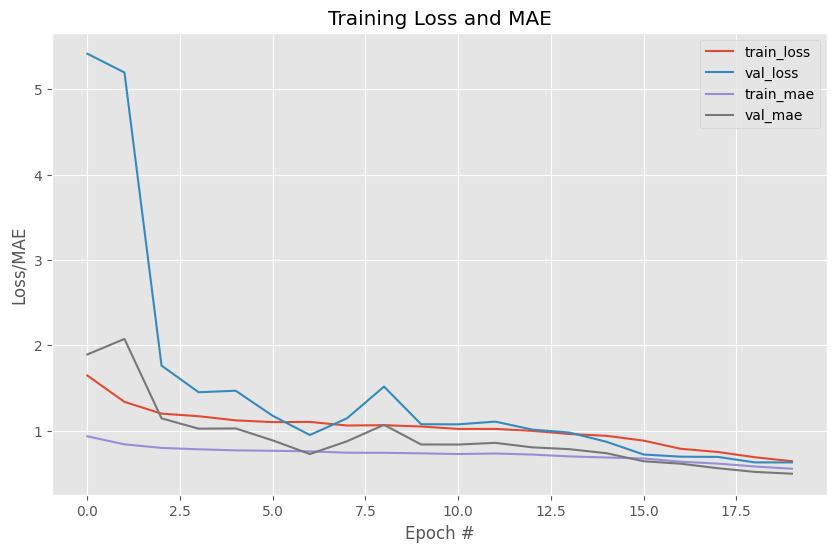

In [ ]:
import matplotlib.pyplot as plt

# Representamos graficamente
plt.style.use("ggplot")

num_epochs = len(H.history['loss'])

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["mae"], label="train_mae")
plt.plot(np.arange(0, num_epochs), H.history["val_mae"], label="val_mae")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend()
plt.show()

In [ ]:
# Conclusiones:
# 1. Las val_loss y val_mae tienen una tendencia hacia abajo lo que indica que el modelo generaliza 'bien'
# 2. Las líneas train_loss y val_loss se mantienen cercanas (no hay sobreajuste y permite generalizar)

# Comparado con una versión anterior:
# Teníamos un modelo con muchas oscilaciones en val_loss y val_mae y practicamente dejaba de aprender en train desde época 5 quedando la línea 'plana' hasta la última época (50)
# Los cambios realizados para obtener la segunda versión (entrega) han sido principalmente:
# Disminución de épocas con aumento de learningrate
# Aumento de dropout (regularización y evitar sobreajuste)
# Retrasar el early fusion (coger un vector de caracterñistica de fases no tan 'tempranas')

In [ ]:
# Calculamos las predicciones desnormalizadas
predictions_final = final_model.predict([X_test, X_test_imgs])
predictions_desnormalizadas = scaler_y.inverse_transform(predictions_final.reshape(-1, 1))

print("Predicciones desnormalizadas:", predictions_desnormalizadas)

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_910', 'keras_tensor_911']. Received: the structure of inputs=('*', '*')
  warnings.warn(


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step
Predicciones desnormalizadas: [[132.89233 ]
 [ 99.32185 ]
 [138.49571 ]
 [ 66.19266 ]
 [139.48582 ]
 [ 73.431015]
 [172.35277 ]
 [403.9171  ]
 [148.3074  ]
 [147.40314 ]
 [406.30426 ]
 [166.25574 ]
 [107.75067 ]
 [ 90.936584]
 [148.26457 ]
 [ 88.77861 ]
 [178.95293 ]
 [129.68437 ]
 [132.90895 ]
 [ 89.445816]
 [136.84842 ]
 [164.3538  ]
 [153.8846  ]
 [226.74666 ]
 [ 85.87427 ]
 [105.71718 ]
 [152.74913 ]
 [105.32378 ]
 [ 92.53481 ]
 [215.95595 ]
 [139.69989 ]
 [ 84.2689  ]
 [135.21188 ]
 [132.41557 ]
 [130.29843 ]
 [105.855064]
 [115.13319 ]
 [285.429   ]
 [113.68402 ]
 [124.55258 ]
 [128.72952 ]
 [106.055466]
 [142.776   ]
 [ 84.82955 ]
 [133.06326 ]
 [102.68157 ]
 [158.14853 ]
 [484.72372 ]
 [135.94615 ]
 [ 83.617195]
 [472.05338 ]
 [310.57257 ]
 [153.69904 ]
 [184.15196 ]
 [290.58884 ]
 [152.2818  ]
 [108.55537 ]
 [352.80206 ]
 [142.74571 ]
 [ 84.151474]
 [112.91015 ]
 [174.80795 ]
 [150.78474 ]
 [ 75.36659 ]
 [134.62561 ]
 [169.66687 ]
 [155

In [ ]:
# 'Tangibilizamos' algunos casos para ver los errores cometidos
y_test_desnormalizado = scaler_y.inverse_transform(y_test.reshape(-1, 1))
for i in range(5):
    print(f"Predicción desnormalizada {i+1}: {predictions_desnormalizadas[i][0]} | Precio real: {y_test_desnormalizado[i][0]}")

Predicción desnormalizada 1: 132.892333984375 | Precio real: 80.0
Predicción desnormalizada 2: 99.32185363769531 | Precio real: 85.0
Predicción desnormalizada 3: 138.49571228027344 | Precio real: 145.0
Predicción desnormalizada 4: 66.19265747070312 | Precio real: 35.0
Predicción desnormalizada 5: 139.48582458496094 | Precio real: 97.0


In [ ]:
# Añadimos el mae resumen como en el resto de modelos.
from sklearn.metrics import mean_absolute_error

predictions_desnormalizadas = scaler_y.inverse_transform(predictions_final.reshape(-1, 1))
y_test_desnormalizado = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Calculamos el MAE en euros
mae_test_euros = mean_absolute_error(y_test_desnormalizado, predictions_desnormalizadas)
print(f"El MAE en el conjunto de prueba es de {mae_test_euros:.2f} euros")

El MAE en el conjunto de prueba es de 64.05 euros


In [24]:
final_model.save('/content/drive/MyDrive/modelo_earlyfusion.keras')